# Analyzing Music Video Trends in Youtube Using Python

https://towardsdatascience.com/analyzing-music-video-trends-in-youtube-using-python-11e5750709bd

In [2]:
from pytrends.request import TrendReq
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium

In [3]:
pytrends = TrendReq(hl='en-US', tz=360)
kw_list = ["music video", "mv"]
pytrends.build_payload(kw_list, cat=0, timeframe='today 5-y', geo='', gprop='youtube')

In [4]:
df_queries = pytrends.related_queries()


In [5]:
top_music_video = df_queries.get("music video").get("top")
top_mv = df_queries.get("mv").get("top")
df_top = pd.concat([top_music_video, top_mv] )
df_top.sort_values(['value'], ascending = False).head(5).reset_index(drop = True)

,query,value
0,official music video,100
1,bts,100
2,mv bts,99
3,blackpink,29
4,mv blackpink,29


In [8]:
pytrends

In [7]:
df_queries

{'music video': {'top':                            query  value
  0           official music video    100
  1                new music video     23
  2                   music videos     19
  3              gacha music video     15
  4         gacha life music video     13
  5        six six six music video     13
  6                            six     13
  7                     music 2019     12
  8                       dj music     11
  9               video game music     11
  10              background music     10
  11        video background music     10
  12             hindi music video     10
  13               hot music video      9
  14                hd music video      8
  15                     sad music      8
  16               sad music video      8
  17            roblox music video      8
  18              music video 2017      7
  19             funny music video      6
  20       music video with lyrics      5
  21  six six six music video 2018      5
  22     mon

In [9]:
rising_music_video = df_queries.get("music video").get("rising")
rising_mv = df_queries.get("mv").get("rising")
df_rising = pd.concat([rising_music_video, rising_mv] )
df_rising.sort_values(['value'], ascending = False).head(5)

,query,value
0,mv blackpink,457300
1,blackpink,455100
0,gacha life music video,208300
2,nct mv,185700
3,nct,185200


In [10]:
kw_list = ["Gacha Life", "Dynamite", "Blackpink", "BTS"]
pytrends.build_payload(kw_list, cat=0, timeframe='today 5-y', geo='', gprop='youtube')
df_interest = pytrends.interest_over_time().drop(columns='isPartial')

Text(0.5, 1.0, 'Music Video Trends Over Time')

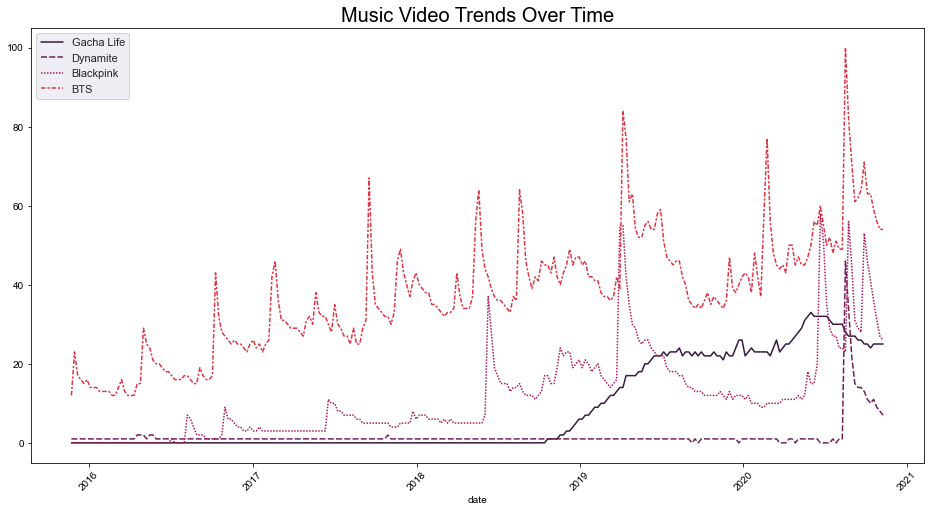

In [11]:
plt.figure(figsize=(16, 8))
plt.xticks(rotation=45)
sns.set(style="darkgrid", palette = 'rocket')
ax = sns.lineplot(data=df_interest)
ax.set_title('Music Video Trends Over Time', fontsize=20)